## **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.helpers import identify_missing_data
os.getcwd()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data into DataFrames
orders_df = pd.read_csv("../data/orders_cleaned.csv")

customers_df = pd.read_csv("../data/customers_cleaned.csv")

In [6]:
# Display the first few rows of the orders DataFrame
print(orders_df.head())

# Display the first few rows of the customers DataFrame
print(customers_df.head())


   order_id      order_timestamp  delivered_timestamp  driver_id  \
0    100001  2021-11-26 18:22:00  2021-11-26 18:49:00        273   
1    100002  2021-07-11 21:23:00  2021-07-11 21:53:00         43   
2    100003  2021-04-27 17:28:00  2021-04-27 17:55:00        299   
3    100004  2021-02-22 18:08:00  2021-02-22 18:35:00        320   
4    100005  2021-06-21 18:14:00  2021-06-21 18:44:00         41   

   restaurant_id  cust_id delivery_region  discount_applied  discount_code  \
0            105     1016          Dublin              True  BLACKFRIDAY21   
1            219     1017            Cork             False    No Discount   
2             48     1019          Dublin             False    No Discount   
3            233     1020          Dublin             False    No Discount   
4            207     1024          Dublin             False    No Discount   

   order_total  discount_pc     status  
0        69.46         20.0  COMPLETED  
1        69.40          0.0  COMPLETED  

In [7]:
# Check data types and non-null counts for orders
print(orders_df.info())

# Check data types and non-null counts for customers
print(customers_df.info())

# Check for missing values in both datasets
print(orders_df.isnull().sum())
print(customers_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             991 non-null    int64  
 1   order_timestamp      991 non-null    object 
 2   delivered_timestamp  991 non-null    object 
 3   driver_id            991 non-null    int64  
 4   restaurant_id        991 non-null    int64  
 5   cust_id              991 non-null    int64  
 6   delivery_region      991 non-null    object 
 7   discount_applied     991 non-null    bool   
 8   discount_code        991 non-null    object 
 9   order_total          991 non-null    float64
 10  discount_pc          991 non-null    float64
 11  status               991 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 86.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column   

In [8]:
# Convert order_timestamp and delivered_timestamp to datetime
orders_df['order_timestamp'] = pd.to_datetime(orders_df['order_timestamp'])
orders_df['delivered_timestamp'] = pd.to_datetime(orders_df['delivered_timestamp'])

# Confirm the changes by checking the data types
print(orders_df.dtypes)

order_id                        int64
order_timestamp        datetime64[ns]
delivered_timestamp    datetime64[ns]
driver_id                       int64
restaurant_id                   int64
cust_id                         int64
delivery_region                object
discount_applied                 bool
discount_code                  object
order_total                   float64
discount_pc                   float64
status                         object
dtype: object


#### 1. Compare Monthly 2021 Sales to 2022 and Determine if Sales Have Grown

In [10]:
# Calculate total sales for each month (2021 and 2022) combined
total_monthly_sales = orders_df.groupby(orders_df['order_timestamp'].dt.to_period('M'))['order_total'].sum().reset_index()

# Rename the column for clarity
total_monthly_sales.columns = ['Month', 'Total Sales (€)']

# Display the total monthly sales
total_monthly_sales

,Month,Total Sales (€)
0,2021-01,197.04
1,2021-02,533.80
2,2021-03,554.00
3,2021-04,724.45
4,2021-05,856.27
5,2021-06,968.77
6,2021-07,939.99
7,2021-08,1204.13
8,2021-09,516.01
9,2021-10,731.66


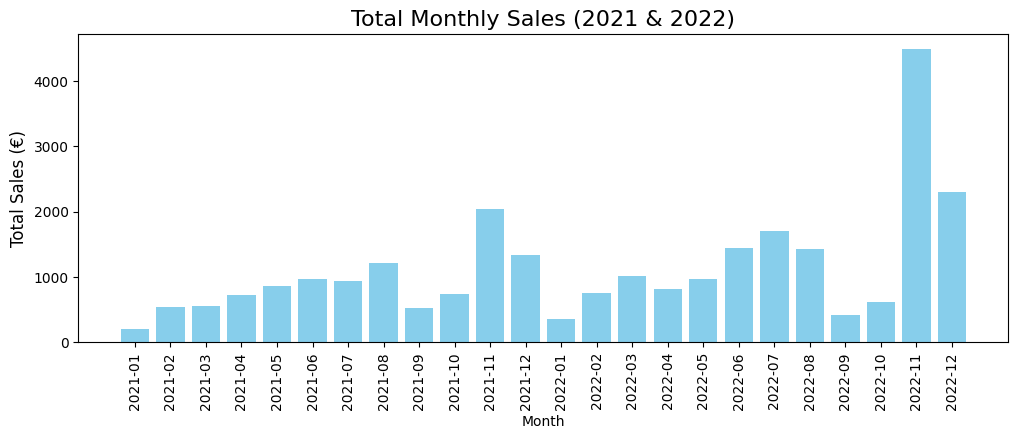

In [20]:
# Visualize total monthly sales using matplotlib without grid

plt.figure(figsize=(12, 4))
plt.bar(total_monthly_sales['Month'].astype(str), total_monthly_sales['Total Sales (€)'], color='skyblue')
plt.title('Total Monthly Sales (2021 & 2022)', fontsize=16)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Sales (€)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

> This strong growth, especially towards the end of the year, might be related to holiday seasons or promotional campaigns like Black Friday.

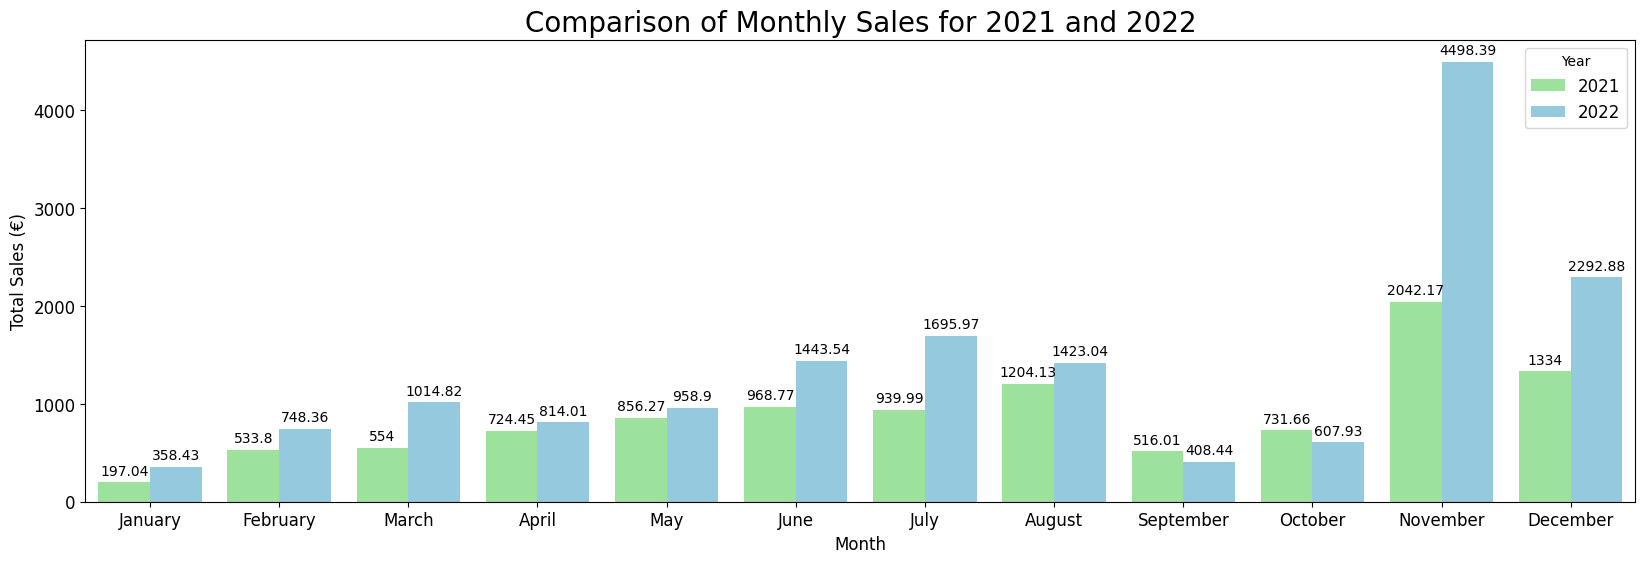

In [29]:
# Extract the month names for clarity in plotting
orders_df['order_month'] = orders_df['order_timestamp'].dt.strftime('%B')

# Group sales by month and year
monthly_sales_comparison = orders_df.groupby(['order_year', 'order_month'])['order_total'].sum().reset_index()

# Order the months for proper display
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales_comparison['order_month'] = pd.Categorical(monthly_sales_comparison['order_month'], categories=months_order, ordered=True)

# Plot the comparison using seaborn
plt.figure(figsize=[20, 6])

# Customize the color palette to light green and skyblue (pastel colors)
ax = sns.barplot(data=monthly_sales_comparison, x='order_month', y='order_total', hue='order_year', palette=['lightgreen', 'skyblue'], errwidth=0)

# Customize the plot
ax.legend(title='Year', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add bar labels to both years
ax.bar_label(ax.containers[0], padding=3)
ax.bar_label(ax.containers[1], padding=3)

# Set title and labels
plt.title('Comparison of Monthly Sales for 2021 and 2022', size=20)
plt.xlabel('Month', size=12)
plt.ylabel('Total Sales (€)', size=12)

# Show the plot
plt.show()

> Conclusion: Sales in 2022 consistently outperformed 2021, with a notable spike in November 2022, likely due to seasonal promotions. This indicates strong year-over-year growth for Happy Deliveries.

#### 2. Looking at the loyalty card holders, what is the age distribution of those customers?

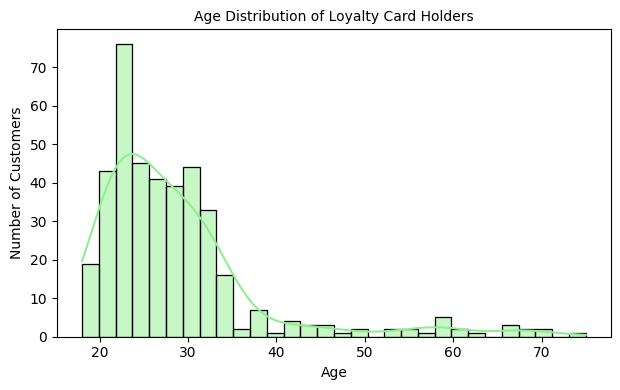

In [38]:
# Plot the age distribution of loyalty card holders with detailed distribution
plt.figure(figsize=(12, 4))

# Single subplot for age distribution with detailed bins and KDE
plt.subplot(1, 2, 2)
sns.histplot(customers_df['age'], bins=30, color='lightgreen', kde=True)
plt.title('Age Distribution of Loyalty Card Holders', fontsize=10)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

> Here is the detailed age distribution of loyalty card holders, showing the breakdown with smaller age groups and a KDE curve for a smoothed view. This visual highlights the concentration of customers in their 20s to early 30s.

#### 3. Is there a relationship between the amount spent by a loyalty card holder and their age

In [40]:
# Merge orders and customers data on 'cust_id' for analysis
merged_df = pd.merge(orders_df, customers_df, left_on='cust_id', right_on='id')

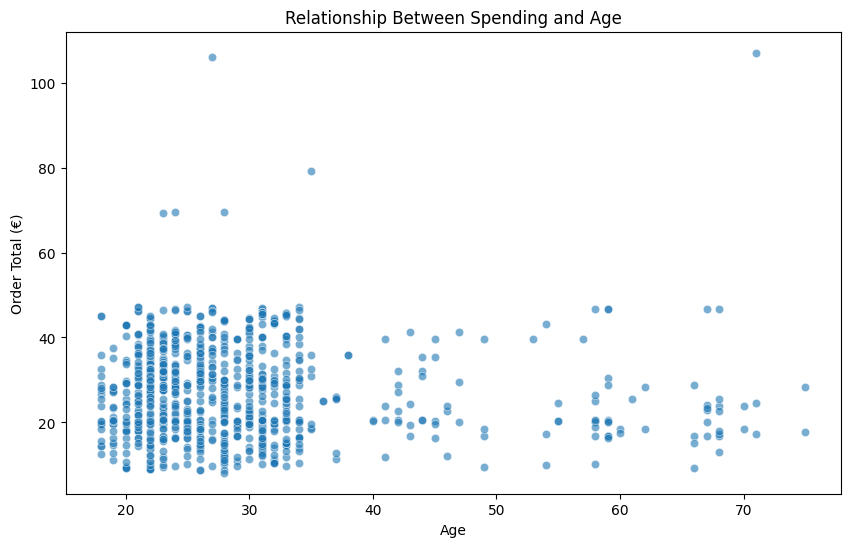

In [45]:
# Plot the relationship between spending and age.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='order_total', data=merged_df, alpha=0.6, palette='viridis')
plt.title('Relationship Between Spending and Age', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Order Total (€)', fontsize=10)
plt.show()


> The scatter plot above shows the relationship between spending and age for loyalty card holders. Based on this visualization:
> 
> * There doesn't appear to be a strong correlation between age and the total amount customers spend.
> * The spending amounts are spread across all age groups, with no clear trend that higher or lower spending is tied to specific age ranges.

#### 4. Is there a relationship between the amount of payment, the age of a person and whether or not they used discount codes.

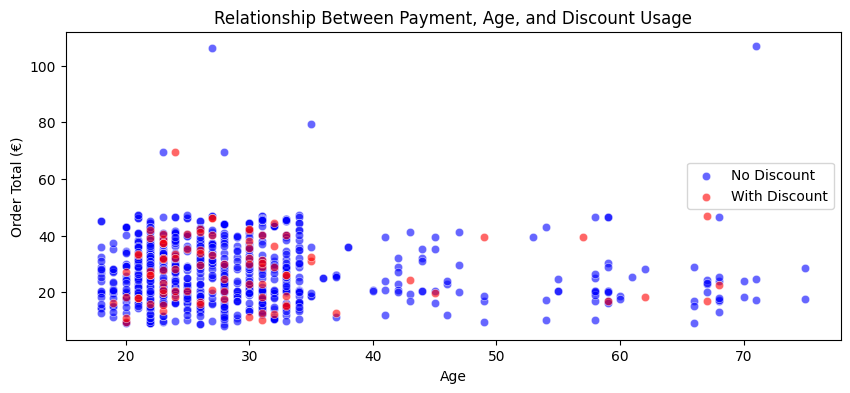

In [49]:
# 4. Relationship Between Payment, Age, and Discount Usage (3-layer scatter plot)

# Separate data into two groups: with and without discount
with_discount = merged_df[merged_df['discount_applied'] == True]
without_discount = merged_df[merged_df['discount_applied'] == False]

# Create a scatter plot with 3 layers (with and without discount)
plt.figure(figsize=(10, 4))
sns.scatterplot(x='age', y='order_total', data=without_discount, label='No Discount', color='blue', alpha=0.6)
sns.scatterplot(x='age', y='order_total', data=with_discount, label='With Discount', color='red', alpha=0.6)
plt.title('Relationship Between Payment, Age, and Discount Usage', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Order Total (€)', fontsize=10)
plt.legend()
plt.show()

> The scatter plot shows the relationship between payment amount, age, and discount usage:
> * Blue points represent customers who did not use a discount.
> * Red points represent customers who used a discount.
> * There isn't a strong trend linking age with the amount spent or discount usage, though both with and without discounts, the spending is similar across different age groups.

#### 5. Compare the sales for 2022 across all regions.

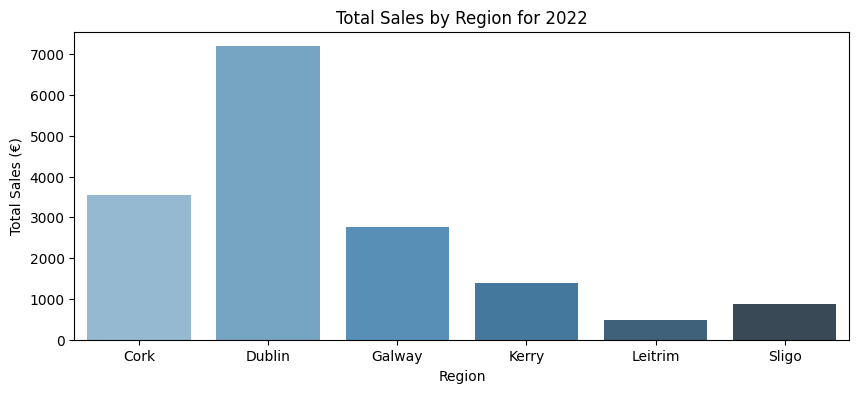

In [52]:
# Filter data for 2022 only
sales_2022 = orders_df[orders_df['order_year'] == 2022]

# Group by region and calculate total sales per region for 2022
region_sales_2022 = sales_2022.groupby('delivery_region')['order_total'].sum().reset_index()

# Plot the sales per region for 2022
plt.figure(figsize=(10, 4))
sns.barplot(x='delivery_region', y='order_total', data=region_sales_2022, palette='Blues_d')
plt.title('Total Sales by Region for 2022', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Sales (€)', fontsize=10)
plt.xticks(rotation=0)
plt.show()

> The bar chart shows the total sales by region for 2022:
> * The highest sales are concentrated in specific regions such as Dublin, which is the leading region by a significant margin.
> * Other regions have noticeably lower sales, indicating that Dublin is the primary market for Happy Deliveries in 2022.

#### 6. Christmas is coming and Happy Deliveries wants to reward their high-spending customers. Who are the top 10 highest-spending customers in 2022? Find their ID, name and email address for the marketing department to contact them with a reward.

In [54]:
# 6. Find the top 10 highest spending customers in 2022
# Group by customer ID and calculate total spending for each customer in 2022
top_customers_2022 = sales_2022.groupby('cust_id')['order_total'].sum().reset_index()

# Sort by order_total in descending order and get the top 10 customers
top_customers_2022 = top_customers_2022.sort_values(by='order_total', ascending=False).head(10)

# Merge with customer details to get name and email
top_customers_details = pd.merge(top_customers_2022, customers_df, left_on='cust_id', right_on='id')

# Select relevant columns for marketing contact
top_customers_details = top_customers_details[['cust_id', 'first_name', 'last_name', 'email', 'order_total']]
# Display the top 10 highest spending customers in 2022 directly
top_customers_details

,cust_id,first_name,last_name,email,order_total
0,1027,Jason,Dudley,Jason_D@zoho.com,151.05
1,1126,Deanna,Knight,DeannaKnight@protonmail.com,146.30
2,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,131.64
3,1023,Gabrielle,Morgan,GMorgan48@mail.com,118.30
4,1021,Joshua,Kidd,Joshua_K@att.com,115.13
5,1018,David,Snyder,David.S@hotmail.com,105.22
6,1227,Andrew,Cantu,Andrew_Cantu@yandex.com,103.94
7,1028,David,Murphy,Murphy.David@mail.com,102.08
8,1029,Meagan,Gonzalez,Gonzalez_Meagan43@mail.com,99.81
9,1059,Brent,Harrell,Harrell.Brent13@protonmail.com,99.38


> The top 10 highest spending customers in 2022, including their ID, name, and email address. These are the customers that Happy Deliveries can reward with a special offer for their loyalty.

#### 7. To keep up with the anticipated increase in sales over Christmas, Happy Deliveries wants to find what are the top 3 restaurants, so they can allocate their resources more efficiently. What are the top 3 restaurants in terms of sales for 2022? Find their name, and total sales

In [55]:
# 7. Find the top 3 restaurants in terms of sales for 2022

# Group by restaurant_id and calculate total sales for each restaurant in 2022
top_restaurants_2022 = sales_2022.groupby('restaurant_id')['order_total'].sum().reset_index()

# Sort by order_total in descending order and get the top 3 restaurants
top_restaurants_2022 = top_restaurants_2022.sort_values(by='order_total', ascending=False).head(3)

# Display the top 3 restaurants with total sales
top_restaurants_2022


,restaurant_id,order_total
7,9,742.06
72,107,645.50
6,8,564.36


> These restaurants generated the highest sales, and Happy Deliveries can focus their resources on supporting these high-performing locations during the Christmas season.

#### 8. The marketing department wants to reach out to non-returning loyalty card customers from 2021 in hopes they can lower their customer churn rate. Find all the customers who are considered non-returning including their ID, name and email. (HINT: Non-returning means they have only made only one purchase)

In [59]:
# 8. Find non-returning loyalty card customers from 2021

# Filter data for 2021 only
sales_2021 = orders_df[orders_df['order_year'] == 2021]

# Find customers who made only one purchase in 2021
non_returning_customers_2021 = sales_2021.groupby('cust_id').size().reset_index(name='purchase_count')
non_returning_customers_2021 = non_returning_customers_2021[non_returning_customers_2021['purchase_count'] == 1]

# Merge non-returning customers with their orders to get additional information
non_returning_customers_orders = pd.merge(non_returning_customers_details, sales_2021, left_on='cust_id', right_on='cust_id')

# Select the relevant columns for the marketing department
non_returning_customers_info = non_returning_customers_orders[['cust_id', 'first_name', 'last_name', 'email', 
                                                               'delivery_region', 'discount_code', 
                                                               'order_total']]

# Display the updated non-returning customer information
non_returning_customers_info

,cust_id,first_name,last_name,email,delivery_region,discount_code,order_total
0,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,Dublin,No Discount,17.36
1,1010,John,Anderson,Anderson_John67@yandex.com,Dublin,No Discount,16.82
2,1011,Kevin,Blankenship,Kevin.B@gmail.com,Cork,HAPPYBIRTHDAY,16.82
3,1012,Lance,Lopez,LLopez@verizon.com,Dublin,No Discount,16.82
4,1014,Kyle,Singh,Singh_Kyle@hotmail.com,Dublin,BLACKFRIDAY21,16.82
...,...,...,...,...,...,...,...
213,1402,Sheila,Gibson,Gibson.Sheila@gmail.com,Dublin,No Discount,24.92
214,1403,Julie,Thomas,JThomas@mail.com,Dublin,No Discount,24.71
215,1404,Sarah,Juarez,SJuarez71@verizon.com,Dublin,No Discount,24.63
216,1405,Tony,Richardson,Richardson.Tony@yandex.com,Cork,No Discount,24.49


#### 9. The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was as successful as last year's ‘BLACKFRIDAY21’. Find the total amount of sales from both discount codes.


In [61]:
# Calculate total sales and number of orders made from all discount codes across all years
discount_sales = orders_df.groupby(['discount_code']).agg({
    'order_id': 'count',
    'order_total': 'sum'
}).reset_index().rename(columns={
    'order_id': 'Number of Orders',
    'order_total': 'Total Sales'
})

# Display the sales summary by discount code
discount_sales

,discount_code,Number of Orders,Total Sales
0,BLACKFRIDAY21,25,734.53
1,BLACKFRIDAY22,46,1211.22
2,HAPPYBIRTHDAY,21,605.66
3,No Discount,899,24315.59


>Conclusion:
The discount code BLACKFRIDAY22 generated higher sales (€1,211.22) and more orders (46) compared to BLACKFRIDAY21 (€734.53 and 25 orders), making it the more successful campaign.

#### 10. What were the locations with the lowest cumulative sales for 2022? Should the marketing department tailor their marketing efforts more towards this location (Perhaps other factors are responsible for example low population)

In [64]:
# 10. Find the locations with the lowest cumulative sales for 2022

# Group by delivery_region and calculate total sales for each region in 2022
lowest_sales_2022 = sales_2022.groupby('delivery_region')['order_total'].sum().reset_index()

# Sort by total sales in descending order (from the biggest to the lowest)
lowest_sales_2022_sorted_desc = lowest_sales_2022.sort_values(by='order_total', ascending=False)

# Display the regions from the biggest to the lowest sales
lowest_sales_2022_sorted_desc.head()



,delivery_region,order_total
1,Dublin,7192.81
0,Cork,3540.83
2,Galway,2752.46
3,Kerry,1399.64
5,Sligo,885.08


In [65]:
# Create a dictionary with population data for the relevant regions
population_data = {
    'Leitrim': 35199,
    'Sligo': 70198,
    'Kerry': 156458,
    'Galway': 276451,  # Galway city + county combined
    'Cork': 584156,    # Cork city + county combined
    'Dublin': 1458154  # Dublin total population
}

# Add the population data to the lowest_sales_2022_sorted_desc dataframe
lowest_sales_2022_sorted_desc['population'] = lowest_sales_2022_sorted_desc['delivery_region'].map(population_data)

# Display the updated sales data with population
lowest_sales_2022_sorted_desc.head()


,delivery_region,order_total,population
1,Dublin,7192.81,1458154
0,Cork,3540.83,584156
2,Galway,2752.46,276451
3,Kerry,1399.64,156458
5,Sligo,885.08,70198


> This provides insight into the sales performance relative to population size. Smaller regions like Sligo and Kerry may benefit from more targeted marketing efforts to increase sales.

> I have added the population data from the 2022 census of Ireland, sourced from [this Wikipedia page](https://en.wikipedia.org/wiki/2022_census_of_Ireland#Census_form), to the sales data for 2022.

> This now allows us to compare sales performance across regions concerning their population, helping to identify areas where marketing efforts could be tailored to increase sales, especially in regions like Sligo and Kerry, which have lower sales despite relatively moderate population sizes.

#### **Conclusions and Recommendations Based on Analysis**

##### **1. Sales Growth and Seasonal Patterns:**
* **Conclusion**: Sales in 2022 consistently outperformed 2021, with a significant spike in November 2022, likely due to Black Friday and other seasonal promotions. However, certain months, such as January, February, May, September, and October, saw lower sales volumes.

* **Recommendation**: To boost sales during these quieter months, Happy Deliveries should introduce seasonal campaigns tied to events such as **Valentine’s Day**, **Mother’s Day**, and **Father’s Day**. Offering special discounts during these times could stimulate demand and increase customer engagement during off-peak periods.


##### **2. Customer Demographics:**
* **Conclusion**: Most loyalty card holders are between **22 and 30 years old**, indicating that the customer base is predominantly younger.

* **Recommendation**: Happy Deliveries should continue to target younger customers through tailored marketing campaigns that appeal to their preferences. This could include **loyalty rewards**, **social media-driven promotions**, and **collaborations with brands** that appeal to this demographic.


##### **3. Spending Patterns and Discounts:**
* **Conclusion**: There is **no strong correlation** between age and spending, with customers across age groups showing similar spending behavior. Additionally, the use of discount codes does not significantly impact spending patterns, although it helps drive engagement.

* **Recommendation**: Happy Deliveries should maintain a broad approach to offering discounts across age groups. However, the company could experiment with **targeted offers** to determine if certain groups respond better to specific types of promotions (e.g., **bulk order discounts**, **free delivery**).


##### **4. Regional Performance:**
* **Conclusion**: **Dublin** is the highest-performing region, followed by **Cork** and **Galway**. Meanwhile, regions like **Sligo**, **Leitrim**, and **Kerry** have the lowest cumulative sales.

* **Recommendation**: Happy Deliveries should explore increasing marketing efforts in underperforming regions like **Sligo**, **Leitrim**, and **Kerry**. This could include **location-based promotions**, partnerships with **local restaurants**, and campaigns to boost brand visibility in these areas.



##### **5. Top-Spending Customers:**
* **Conclusion**: The top 10 highest spending customers in 2022 spent between **€99 and €151**.

* **Recommendation**: To foster loyalty, Happy Deliveries should offer **exclusive rewards** or **personalized offers** to these high-spending customers. This could help retain their business and encourage higher spending in the future.



##### **6. Non-returning Customers:**
* **Conclusion**: There were **161 non-returning customers** in 2022 who made only one purchase in 2021.

* **Recommendation**: To reduce churn, Happy Deliveries should implement a **re-engagement campaign** for these non-returning customers. Sending **personalized emails** with **special offers** or **discount vouchers** could encourage them to make another purchase and re-engage with the platform.



##### **7. Discount Code Success:**
* **Conclusion**: The **BLACKFRIDAY22** campaign was more successful than **BLACKFRIDAY21**, generating higher sales (€1,211.22 vs. €734.53) and more orders.

* **Recommendation**: Happy Deliveries should continue to focus on **seasonal promotions** like **Black Friday**, as they clearly drive significant sales. Expanding similar campaigns (e.g., **Cyber Monday**, **Holiday Specials**) could further boost revenue during key shopping periods.
